# Examples in Python

## Lewiston-Clarkston Valley Formaldehyde Study (2016)

### Basic setup

In [1]:
%matplotlib inline

import pandas as pd
from windrose import WindroseAxes

In [2]:
%ls

CO_1min_20160630.csv      li840a_20160707.txt       O3_30min_20160630.csv
CO_30min_20160630.csv     NONO2_1min_20160630.csv   readme.md
Examples in Python.ipynb  NONO2_30min_20160630.csv  SO2_1min_20160630.csv
Lewiston_Rack160630.txt   O3_1min_20160630.csv      SO2_30min_20160630.csv


### Importing

#### Rack Files (DAQFactory)

<http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table>

In [3]:
rack = pd.read_csv('Lewiston_Rack160630.txt',
                   # HINT indexing begins with 0
                   header=0, # headers 1st row
                   index_col=0, # timestamps 1st column
                   # specify as seconds to recognize unix epoch timestamps
                   date_parser=lambda x: pd.to_datetime(x, unit='s'),
                   parse_dates=True)

rack.head() # try `.tail()` to see the end instead

LabjackU3_T  LI840A_CO2  LI840A_H2O   TAPI_CO  \
TheTime                                                                     
2016-06-30 00:01:14.666000     20.43913    450.8072    10.95844  193.2129   
2016-06-30 00:02:14.665000     20.57796    449.3582    10.96617  193.3431   
2016-06-30 00:03:14.665000     20.77096    446.7017    10.89469  193.4733   
2016-06-30 00:04:14.664000     21.03507    454.7920    10.93333  193.3919   
2016-06-30 00:05:14.664000     21.28902    449.0362    10.82771  193.1966   

                             TAPI_NO  TAPI_NO2  TAPI_NOx   TAPI_O3  TAPI_SO2  \
TheTime                                                                        
2016-06-30 00:01:14.666000  3.356120  2.408854  5.706380  28.62710  0.206505   
2016-06-30 00:02:14.665000  3.372396  2.552083  5.887044  29.22985  0.191008   
2016-06-30 00:03:14.665000  3.408203  2.690430  6.022135  29.64040  0.186178   
2016-06-30 00:04:14.664000  3.471680  2.815755  6.210938  29.46129  0.216567   
2016-06-30 00:05:14.664000  3.494466  2.989909  6.386719  29.23287  0.214152   

                            TSI_flow    WXT_Dm    WXT_Dn    WXT_Dx  WXT_Hc  \
TheTime                                                                      
2016-06-30 00:01:14.666000  1.380509  116.7667  115.6667  117.8333     NaN   
2016-06-30 00:02:14.665000  1.433969  111.5333  110.1667  113.3333     NaN   
2016-06-30 00:03:14.665000  1.437424  108.2667  106.0333  111.0000     NaN   
2016-06-30 00:04:14.664000  1.442756  108.3333  104.0333  112.2333     NaN   
2016-06-30 00:05:14.664000  1.415293  114.4667  111.3333  117.3667     NaN   

                            WXT_Hd  WXT_Hi  WXT_Hp  WXT_Pa  WXT_Rc  WXT_Rd      
TheTime                                                                         
2016-06-30 00:01:14.666000     NaN     NaN     NaN   977.2     NaN     NaN ...  
2016-06-30 00:02:14.665000     NaN     NaN     NaN   977.2     NaN     NaN ...  
2016-06-30 00:03:14.665000     NaN     NaN     NaN   977.2     NaN     NaN ...  
2016-06-30 00:04:14.664000     NaN     NaN     NaN   977.2     NaN     NaN ...  
2016-06-30 00:05:14.664000     NaN     NaN     NaN   977.2     NaN     NaN ...  

[5 rows x 27 columns]

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#shifting-lagging

In [4]:
# roll back timestamps from UTC to Pacific Standard Time
rack = rack.shift(-8, freq='h') # not an in-place operation
rack.head()

LabjackU3_T  LI840A_CO2  LI840A_H2O   TAPI_CO  \
TheTime                                                                     
2016-06-29 16:01:14.666000     20.43913    450.8072    10.95844  193.2129   
2016-06-29 16:02:14.665000     20.57796    449.3582    10.96617  193.3431   
2016-06-29 16:03:14.665000     20.77096    446.7017    10.89469  193.4733   
2016-06-29 16:04:14.664000     21.03507    454.7920    10.93333  193.3919   
2016-06-29 16:05:14.664000     21.28902    449.0362    10.82771  193.1966   

                             TAPI_NO  TAPI_NO2  TAPI_NOx   TAPI_O3  TAPI_SO2  \
TheTime                                                                        
2016-06-29 16:01:14.666000  3.356120  2.408854  5.706380  28.62710  0.206505   
2016-06-29 16:02:14.665000  3.372396  2.552083  5.887044  29.22985  0.191008   
2016-06-29 16:03:14.665000  3.408203  2.690430  6.022135  29.64040  0.186178   
2016-06-29 16:04:14.664000  3.471680  2.815755  6.210938  29.46129  0.216567   
2016-06-29 16:05:14.664000  3.494466  2.989909  6.386719  29.23287  0.214152   

                            TSI_flow    WXT_Dm    WXT_Dn    WXT_Dx  WXT_Hc  \
TheTime                                                                      
2016-06-29 16:01:14.666000  1.380509  116.7667  115.6667  117.8333     NaN   
2016-06-29 16:02:14.665000  1.433969  111.5333  110.1667  113.3333     NaN   
2016-06-29 16:03:14.665000  1.437424  108.2667  106.0333  111.0000     NaN   
2016-06-29 16:04:14.664000  1.442756  108.3333  104.0333  112.2333     NaN   
2016-06-29 16:05:14.664000  1.415293  114.4667  111.3333  117.3667     NaN   

                            WXT_Hd  WXT_Hi  WXT_Hp  WXT_Pa  WXT_Rc  WXT_Rd      
TheTime                                                                         
2016-06-29 16:01:14.666000     NaN     NaN     NaN   977.2     NaN     NaN ...  
2016-06-29 16:02:14.665000     NaN     NaN     NaN   977.2     NaN     NaN ...  
2016-06-29 16:03:14.665000     NaN     NaN     NaN   977.2     NaN     NaN ...  
2016-06-29 16:04:14.664000     NaN     NaN     NaN   977.2     NaN     NaN ...  
2016-06-29 16:05:14.664000     NaN     NaN     NaN   977.2     NaN     NaN ...  

[5 rows x 27 columns]

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#resampling

In [5]:
rack = rack.resample('T') # align to whole minutes (also not in-place op)
rack.head()

LabjackU3_T  LI840A_CO2  LI840A_H2O   TAPI_CO   TAPI_NO  \
TheTime                                                                        
2016-06-29 16:01:00     20.43913    450.8072    10.95844  193.2129  3.356120   
2016-06-29 16:02:00     20.57796    449.3582    10.96617  193.3431  3.372396   
2016-06-29 16:03:00     20.77096    446.7017    10.89469  193.4733  3.408203   
2016-06-29 16:04:00     21.03507    454.7920    10.93333  193.3919  3.471680   
2016-06-29 16:05:00     21.28902    449.0362    10.82771  193.1966  3.494466   

                     TAPI_NO2  TAPI_NOx   TAPI_O3  TAPI_SO2  TSI_flow  \
TheTime                                                                 
2016-06-29 16:01:00  2.408854  5.706380  28.62710  0.206505  1.380509   
2016-06-29 16:02:00  2.552083  5.887044  29.22985  0.191008  1.433969   
2016-06-29 16:03:00  2.690430  6.022135  29.64040  0.186178  1.437424   
2016-06-29 16:04:00  2.815755  6.210938  29.46129  0.216567  1.442756   
2016-06-29 16:05:00  2.989909  6.386719  29.23287  0.214152  1.415293   

                       WXT_Dm    WXT_Dn    WXT_Dx  WXT_Hc  WXT_Hd  WXT_Hi  \
TheTime                                                                     
2016-06-29 16:01:00  116.7667  115.6667  117.8333     NaN     NaN     NaN   
2016-06-29 16:02:00  111.5333  110.1667  113.3333     NaN     NaN     NaN   
2016-06-29 16:03:00  108.2667  106.0333  111.0000     NaN     NaN     NaN   
2016-06-29 16:04:00  108.3333  104.0333  112.2333     NaN     NaN     NaN   
2016-06-29 16:05:00  114.4667  111.3333  117.3667     NaN     NaN     NaN   

                     WXT_Hp  WXT_Pa  WXT_Rc  WXT_Rd      
TheTime                                                  
2016-06-29 16:01:00     NaN   977.2     NaN     NaN ...  
2016-06-29 16:02:00     NaN   977.2     NaN     NaN ...  
2016-06-29 16:03:00     NaN   977.2     NaN     NaN ...  
2016-06-29 16:04:00     NaN   977.2     NaN     NaN ...  
2016-06-29 16:05:00     NaN   977.2     NaN     NaN ...  

[5 rows x 27 columns]

#### CO2/H2O Analyzer Files (LI-840A Software)

In [6]:
li840a_1hz = pd.read_table('li840a_20160707.txt', # table for tab-separated
                           header=1, # header 1st row names 2nd
                           parse_dates={'timestamp': [0,1]}, # combine 1st, 2nd col
                           index_col=0) # dates 1st col
li840a_1hz.head()

,CO2(ppm),H2O(ppt),H2O(C),Cell_Temperature(C),Cell_Pressure(kPa)
timestamp,,,,,
2016-07-07 16:42:12,420.87,9.27,4.72,51.25,92.66
2016-07-07 16:42:13,420.28,9.24,4.67,51.23,92.65
2016-07-07 16:42:14,420.38,9.28,4.73,51.25,92.67
2016-07-07 16:42:15,421.03,9.27,4.72,51.25,92.67
2016-07-07 16:42:16,420.42,9.28,4.73,51.27,92.66


In [7]:
li840a = li840a_1hz.resample('T') # downsample to 1-min (mean is default)
li840a.head()

,CO2(ppm),H2O(ppt),H2O(C),Cell_Temperature(C),Cell_Pressure(kPa)
timestamp,,,,,
2016-07-07 16:42:00,420.595000,9.314318,4.789091,51.258636,92.669318
2016-07-07 16:43:00,420.203860,9.389474,4.905263,51.259825,92.667018
2016-07-07 16:44:00,420.131500,9.449500,4.997333,51.260667,92.668167
2016-07-07 16:45:00,420.172167,9.494000,5.066833,51.259000,92.695500
2016-07-07 16:46:00,420.326000,9.604833,5.233833,51.259833,92.693500


In [8]:
li840a_1hz.resample('1h', how='max').head() # ex: to hourly values, by max value

,CO2(ppm),H2O(ppt),H2O(C),Cell_Temperature(C),Cell_Pressure(kPa)
timestamp,,,,,
2016-07-07 16:00:00,423.32,10.07,5.91,51.29,92.74
2016-07-07 17:00:00,420.17,10.39,6.38,51.29,92.76
2016-07-07 18:00:00,426.26,10.60,6.65,51.29,92.77
2016-07-07 19:00:00,439.98,11.15,7.41,51.31,92.81
2016-07-07 20:00:00,441.56,11.21,7.48,51.31,92.86


#### Teledyne Analyzer Files (APICOM)

In [9]:
def read_tapi(filepath):
    return pd.read_csv(filepath,
                       header=0, # names 1st row
                       index_col=0, # timestamps 1st col
                       parse_dates=True, # US format (MM/DD/YYYY)
                       skipinitialspace=True) # has spaces and commas

In [10]:
co = read_tapi('CO_1min_20160630.csv')
co.head()

,CONC1-AVG (PPM),STABIL-AVG (PPM)
Time Stamp,,
2016-06-27 12:53:01,0.326282,0.021076
2016-06-27 12:54:01,0.322445,0.019224
2016-06-27 12:55:01,0.320961,0.019224
2016-06-27 12:56:01,0.322613,0.016943
2016-06-27 12:57:01,0.326330,0.016943


In [11]:
co = co.resample('T') # put data on whole minute timestamp
#co = co.shift(-1, freq='s') # will produce same results
co.head()

,CONC1-AVG (PPM),STABIL-AVG (PPM)
Time Stamp,,
2016-06-27 12:53:00,0.326282,0.021076
2016-06-27 12:54:00,0.322445,0.019224
2016-06-27 12:55:00,0.320961,0.019224
2016-06-27 12:56:00,0.322613,0.016943
2016-06-27 12:57:00,0.326330,0.016943


In [12]:
co.columns

Index([u'CONC1-AVG (PPM)', u'STABIL-AVG (PPM)'], dtype='object')

In [13]:
co.columns = ['co', 'co_stabil'] # give nice names instead
co.columns

Index([u'co', u'co_stabil'], dtype='object')

In [14]:
nox = read_tapi('NONO2_1min_20160630.csv')
nox.head()

,NOXCNC1-AVG (PPB),NOCNC1-AVG (PPB),NO2CNC1-AVG (PPB),STABIL-AVG (PPM)
Time Stamp,,,,
2016-06-27 12:53:01,7.5643,2.1399,5.4245,0.0957
2016-06-27 12:54:01,7.3682,2.0629,5.3053,0.1720
2016-06-27 12:55:01,7.1038,1.9771,5.1268,0.2378
2016-06-27 12:56:01,6.8719,1.9167,4.9553,0.2733
2016-06-27 12:57:01,6.7139,1.8708,4.8430,0.2680


In [15]:
nox.columns = ['nox', 'no', 'no2', 'nox_stabil']

In [16]:
o3 = read_tapi('O3_1min_20160630.csv')
o3.head()

,CONC1-AVG (PPB)
Time Stamp,
2016-06-27 12:17:01,41.4
2016-06-27 12:18:01,42.3
2016-06-27 12:20:01,40.2
2016-06-27 12:21:01,39.1
2016-06-27 12:22:01,39.9


In [17]:
o3.columns = ['o3']

In [18]:
so2 = read_tapi('SO2_1min_20160630.csv')
so2.head()

,CONC1-AVG (PPB),STABIL-AVG (PPB)
Time Stamp,,
2016-06-27 12:42:01,0.3592,0.0143
2016-06-27 12:43:01,0.3628,0.0085
2016-06-27 12:44:01,0.3781,0.0062
2016-06-27 12:45:01,0.4011,0.0127
2016-06-27 12:46:01,0.4228,0.0208


In [19]:
so2.columns = ['so2', 'so2_stabil']

### Plotting

http://pandas.pydata.org/pandas-docs/stable/visualization.html#basic-plotting-plot

In [20]:
rack.columns

Index([u'LabjackU3_T', u'LI840A_CO2', u'LI840A_H2O', u'TAPI_CO', u'TAPI_NO', u'TAPI_NO2', u'TAPI_NOx', u'TAPI_O3', u'TAPI_SO2', u'TSI_flow', u'WXT_Dm', u'WXT_Dn', u'WXT_Dx', u'WXT_Hc', u'WXT_Hd', u'WXT_Hi', u'WXT_Hp', u'WXT_Pa', u'WXT_Rc', u'WXT_Rd', u'WXT_Ri', u'WXT_Rp', u'WXT_Sm', u'WXT_Sn', u'WXT_Sx', u'WXT_Ta', u'WXT_Ua'], dtype='object')

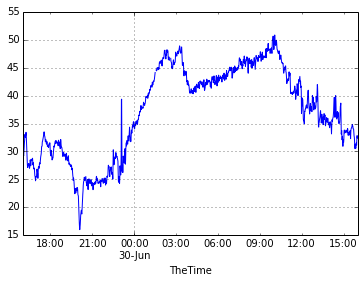

In [21]:
rack['TAPI_O3'].plot() # select a column

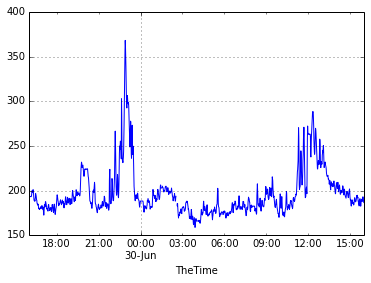

In [22]:
rack.TAPI_CO.plot() # easier way to select a column

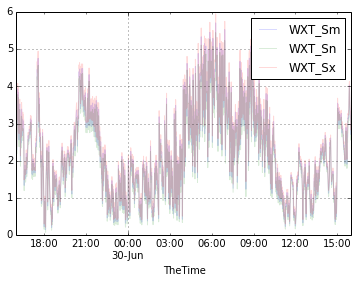

In [23]:
# select multiple columns with list of names
rack[['WXT_Sm', 'WXT_Sn', 'WXT_Sx']].plot(alpha=0.15) # alpha = transparency

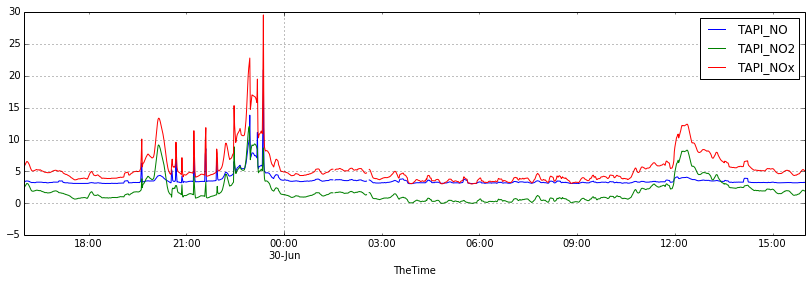

In [24]:
rack[['TAPI_NO', 'TAPI_NO2', 'TAPI_NOx']].plot(figsize=(14,4)) # bigger

In [25]:
li840a.columns

Index([u'CO2(ppm)', u'H2O(ppt)', u'H2O(C)', u'Cell_Temperature(C)', u'Cell_Pressure(kPa)'], dtype='object')

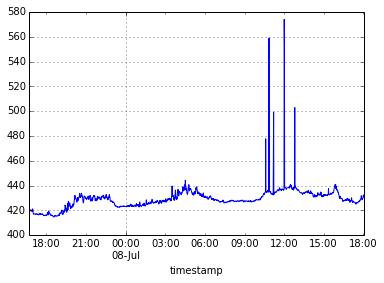

In [26]:
li840a['CO2(ppm)'].plot() # columns with funny characters require this selection method

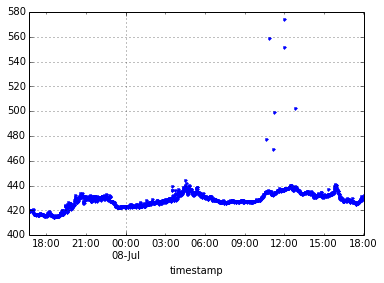

In [27]:
li840a['CO2(ppm)'].plot(style='.') # line plots can skew perception

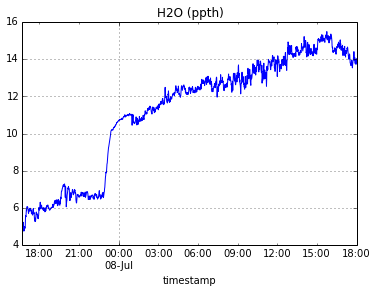

In [28]:
li840a['H2O(C)'].plot(title="H2O (ppth)") # titles

[<matplotlib.text.Text at 0xafdd37ec>, <matplotlib.text.Text at 0xafd95e8c>]

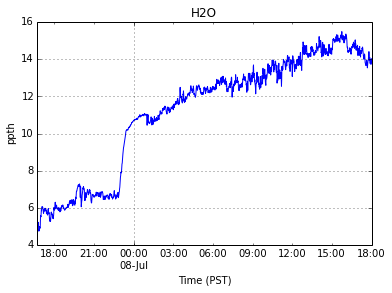

In [29]:
p1 = li840a['H2O(C)'].plot(title='H2O') # save the plot for advanced configuration
p1.set(ylabel='ppth', xlabel='Time (PST)') # like axis labels

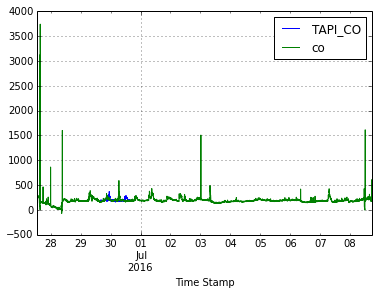

In [30]:
pd.DataFrame([rack.TAPI_CO, 1000*co.co]).T.plot()